<a href="https://colab.research.google.com/github/MaxSMCON/Group07/blob/main/TF_neural_net_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2021-11-21

# Check GPU

In [ ]:
!nvidia-smi

Tue Dec  7 14:54:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Import stuff

In [ ]:
import os, glob
import numpy as np
import pandas as pd
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
tf.__version__

'2.7.0'

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


# Load data

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
X_test: (10000, 28, 28)
y_train: (60000,)
y_test: (10000,)


Showing X_train[14985] 👉 label: 9


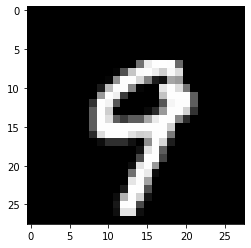

In [ ]:
img_idx = np.random.randint(0,len(X_train)-1)
print(f"Showing X_train[{img_idx}] 👉 label: {y_train[img_idx]}")
plt.imshow(X_train[img_idx], cmap="gray");

# Prepare the data for neural net

## Scale the features to 0-1

In [ ]:
X_train.min(), X_train.max()

(0, 255)

In [ ]:
X_train_nomarlized = X_train/255
X_test_nomarlized = X_test/255
X_train_nomarlized.min(), X_train_nomarlized.max()

(0.0, 1.0)

## Expand dimension for feeding into TF

In [ ]:
 #add another dimension to the end of the data to represent the number of channel (we have 1 channel for the image because it's black and white)
X_train_TF = np.expand_dims(X_train_nomarlized, 3)
X_test_TF = np.expand_dims(X_test_nomarlized, 3)
print(f"X_train_TF: {X_train_TF.shape}")
print(f"X_test_TF: {X_test_TF.shape}")

X_train_TF: (60000, 28, 28, 1)
X_test_TF: (10000, 28, 28, 1)


## One-hot encode the target (for multiclass classification)

In [ ]:
y_train.shape

(60000,)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)
y_train_onehot.shape

(60000, 10)

# Define the model architecture

## Simple fully connected

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


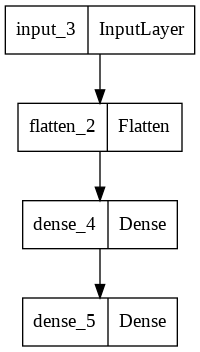

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input

model = Sequential([
  Input(shape=(28, 28, 1)),
  Flatten(),
  Dense(128, activation="relu"),
  Dense(10, activation="softmax"),
])

model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
784*128 + 128

100480

## CNN

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 flatten_3 (Flatten)         (None, 6272)             

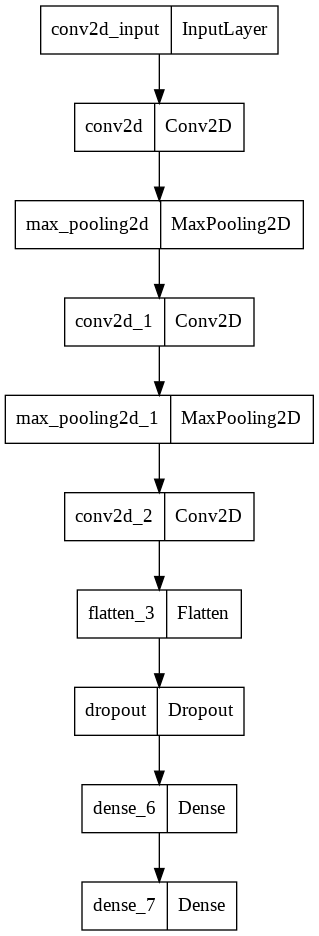

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, Input, MaxPooling2D, Dropout

model = Sequential(
    [
        Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu"),
        Flatten(),
        Dropout(0.1),
        Dense(512, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

## FCN (Fully Convolutional Network)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 3, 3, 128)       

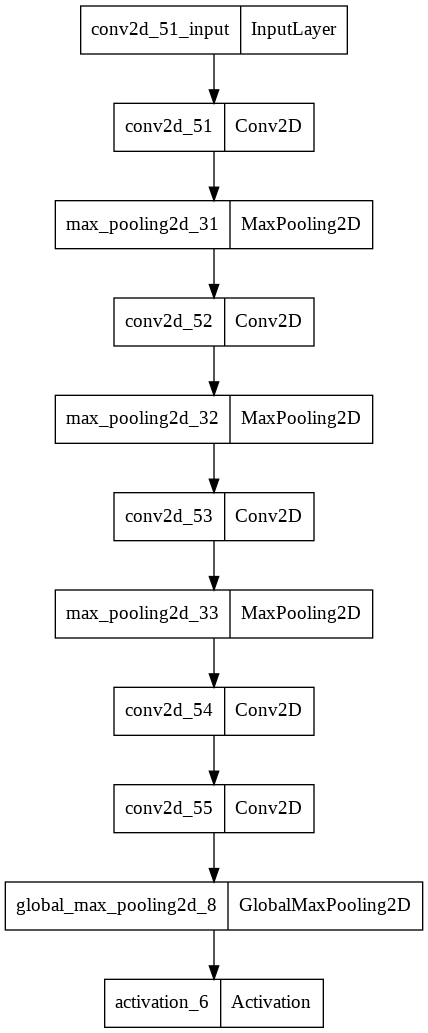

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, Input, MaxPooling2D, Dropout, GlobalMaxPooling2D, Activation

model = Sequential(
    [
        Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=1, padding="same", activation="relu"),
        # Dropout(0.1),
        Conv2D(10, kernel_size=1, padding="same", activation="relu"),
        GlobalMaxPooling2D(),
        Activation(activation="softmax"),
    ]
)

model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

# Compile the model for training

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=1E-2),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Training

## (Optional) Enable check points during training

In [ ]:
checkpoint_filepath = 'checkpoint'
# !rm "$checkpoint_filepath"/ -r
!mkdir "$checkpoint_filepath"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

mkdir: cannot create directory ‘checkpoint’: File exists


## (Optional) Enable early-stopping during training

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

# Train the model

In [ ]:
history = model.fit(
    x=X_train_TF,
    y=y_train_onehot,
    epochs=20,
    batch_size=1024,
    validation_data=(X_test_TF, y_test_onehot),
    callbacks=[model_checkpoint_callback,early_stopping],
)

Epoch 1/20
59/59 [==============================] - 6s 90ms/step - loss: 0.8470 - accuracy: 0.7271 - val_loss: 0.1624 - val_accuracy: 0.9520
Epoch 2/20
59/59 [==============================] - 5s 83ms/step - loss: 0.1488 - accuracy: 0.9549 - val_loss: 0.0982 - val_accuracy: 0.9693
Epoch 3/20
59/59 [==============================] - 5s 85ms/step - loss: 0.0966 - accuracy: 0.9711 - val_loss: 0.0981 - val_accuracy: 0.9713
Epoch 4/20
59/59 [==============================] - 5s 89ms/step - loss: 0.0736 - accuracy: 0.9777 - val_loss: 0.0741 - val_accuracy: 0.9770
Epoch 5/20
59/59 [==============================] - 5s 85ms/step - loss: 0.0546 - accuracy: 0.9837 - val_loss: 0.0581 - val_accuracy: 0.9822
Epoch 6/20
59/59 [==============================] - 3s 59ms/step - loss: 0.0468 - accuracy: 0.9859 - val_loss: 0.0703 - val_accuracy: 0.9780
Epoch 7/20
59/59 [==============================] - 4s 61ms/step - loss: 0.0427 - accuracy: 0.9869 - val_loss: 0.0711 - val_accuracy: 0.9791
Epoch 8/20
59

# Review learning curve

In [ ]:
df_history = pd.DataFrame(history.history)
df_history["epoch"] = history.epoch
df_history

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.846957,0.727050,0.162445,0.9520,0
1,0.148795,0.954900,0.098238,0.9693,1
2,0.096589,0.971100,0.098106,0.9713,2
3,0.073638,0.977733,0.074149,0.9770,3
4,0.054562,0.983700,0.058125,0.9822,4
5,0.046816,0.985917,0.070310,0.9780,5
6,0.042668,0.986950,0.071111,0.9791,6
7,0.034388,0.989100,0.063635,0.9823,7
8,0.032273,0.989750,0.071082,0.9807,8
9,0.025571,0.991717,0.062212,0.9828,9


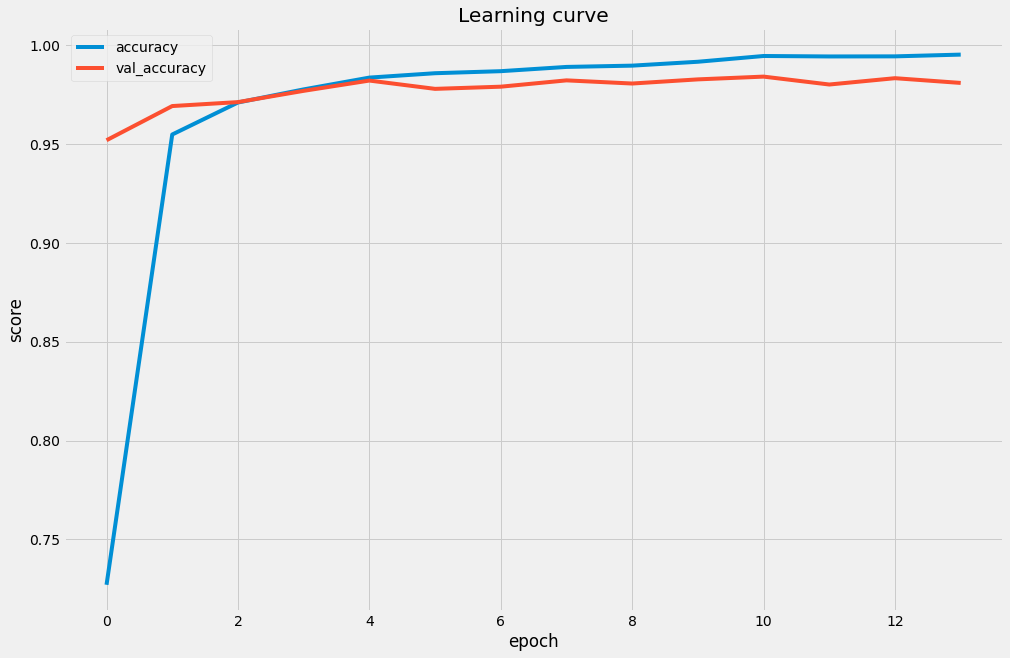

In [ ]:
# if validation score is higher than training score, it could mean high bias: https://stackoverflow.com/a/45854380
with plt.style.context("fivethirtyeight"):
  ax = df_history.plot(x="epoch", y=["accuracy", "val_accuracy"], figsize=(15,10), title="Learning curve");
  ax.set_ylabel("score")

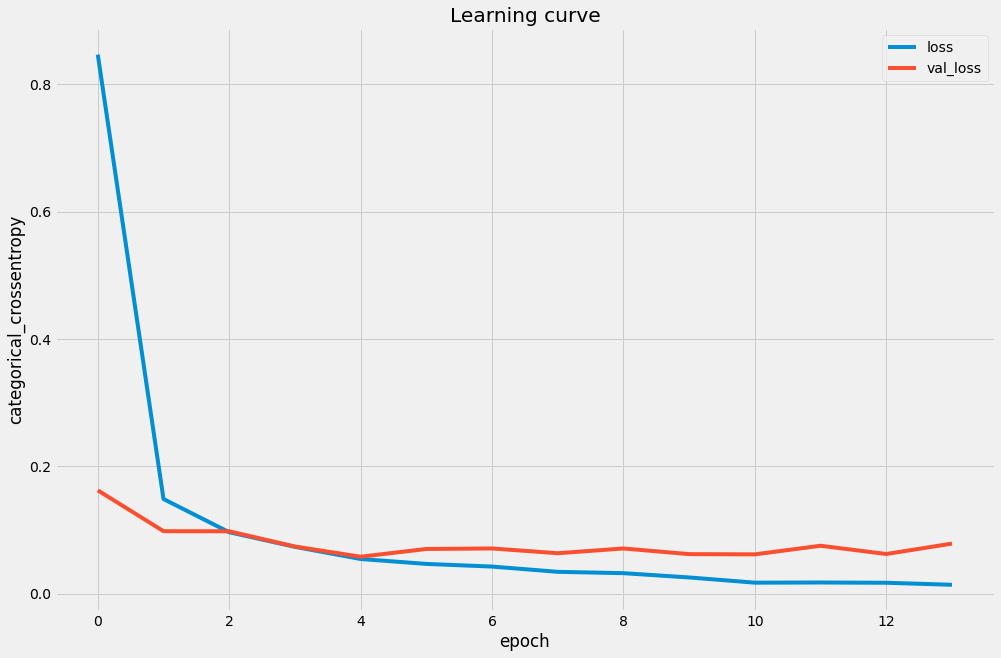

In [ ]:
with plt.style.context("fivethirtyeight"):
  ax = df_history.plot(x="epoch", y=["loss", "val_loss"], figsize=(15,10), title="Learning curve");
  ax.set_ylabel(model.loss)

# Save model

In [ ]:
model.save('model.h5')

# Load model

In [ ]:
model = tf.keras.models.load_model('model.h5')

# Prediction

Showing X_test[7651] 👉 label: 9
Predicted probabilities: {0: 2.7231401e-06, 1: 0.00013704658, 2: 2.8581231e-05, 3: 0.001011559, 4: 0.021401752, 5: 2.807297e-06, 6: 1.5513249e-06, 7: 0.00035050782, 8: 0.0050545502, 9: 0.97200894}
Predicted class: 9


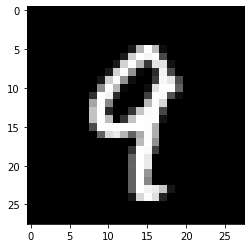

In [ ]:
img_idx = np.random.randint(0,len(X_test_TF)-1)
print(f"Showing X_test[{img_idx}] 👉 label: {y_test[img_idx]}")
plt.imshow(X_test[img_idx], cmap="gray");

y_pred_scores = model.predict(X_test_TF[[img_idx]])
dict_probabilities = dict(zip(np.unique(y_test), y_pred_scores[0]))
print(f"Predicted probabilities: {dict_probabilities}")
predicted_class = max(dict_probabilities, key=dict_probabilities.get)
print(f"Predicted class: {predicted_class}")

# Useful resources

SHAP for visualizing feature importance:

https://github.com/slundberg/shap

Different activation functions compared:

https://arxiv.org/ftp/arxiv/papers/2010/2010.09458.pdf

Different optimizers compared:

https://mlfromscratch.com/optimizers-explained/

Play with learning rate and momentum:

https://distill.pub/2017/momentum/

Play with neural networks:

https://playground.tensorflow.org/